<a href="https://colab.research.google.com/github/BerkayArdaa/ML_Binnary_Classification_For_Healthcare/blob/main/ML_Project_HW2_Result1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
df = pd.read_csv("Dataset/diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
# import tensort
!pip install tensorflow scikit-learn matplotlib pandas numpy



In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers



In [7]:
# Load the Dataset
df = pd.read_csv("/content/Dataset/diabetes_binary_health_indicators_BRFSS2015.csv")
print("Dataset shape:", df.shape)
df.head()



Dataset shape: (253680, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [8]:
# Separate Inputs and Target
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

print("Input features:", X.shape[1])
print("Target distribution:")
print(y.value_counts(normalize=True))


Input features: 21
Target distribution:
Diabetes_binary
0.0    0.860667
1.0    0.139333
Name: proportion, dtype: float64


In [9]:
# Split and Normalize Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [10]:
# Build the Neural Network
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # sigmoid for 0–1 output
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the Model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=25,
    batch_size=512,
    verbose=2
)



Epoch 1/25
318/318 - 6s - 20ms/step - accuracy: 0.8613 - loss: 0.3354 - val_accuracy: 0.8668 - val_loss: 0.3127
Epoch 2/25
318/318 - 1s - 2ms/step - accuracy: 0.8632 - loss: 0.3207 - val_accuracy: 0.8685 - val_loss: 0.3096
Epoch 3/25
318/318 - 1s - 2ms/step - accuracy: 0.8640 - loss: 0.3185 - val_accuracy: 0.8682 - val_loss: 0.3105
Epoch 4/25
318/318 - 1s - 3ms/step - accuracy: 0.8644 - loss: 0.3169 - val_accuracy: 0.8694 - val_loss: 0.3082
Epoch 5/25
318/318 - 1s - 2ms/step - accuracy: 0.8646 - loss: 0.3159 - val_accuracy: 0.8694 - val_loss: 0.3081
Epoch 6/25
318/318 - 1s - 2ms/step - accuracy: 0.8652 - loss: 0.3156 - val_accuracy: 0.8692 - val_loss: 0.3081
Epoch 7/25
318/318 - 1s - 2ms/step - accuracy: 0.8654 - loss: 0.3149 - val_accuracy: 0.8690 - val_loss: 0.3076
Epoch 8/25
318/318 - 1s - 2ms/step - accuracy: 0.8648 - loss: 0.3146 - val_accuracy: 0.8692 - val_loss: 0.3076
Epoch 9/25
318/318 - 1s - 2ms/step - accuracy: 0.8658 - loss: 0.3140 - val_accuracy: 0.8690 - val_loss: 0.3074


In [12]:
# Evaluate Performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.4f}")



1586/1586 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8650 - loss: 0.3139
✅ Test Accuracy: 0.8654


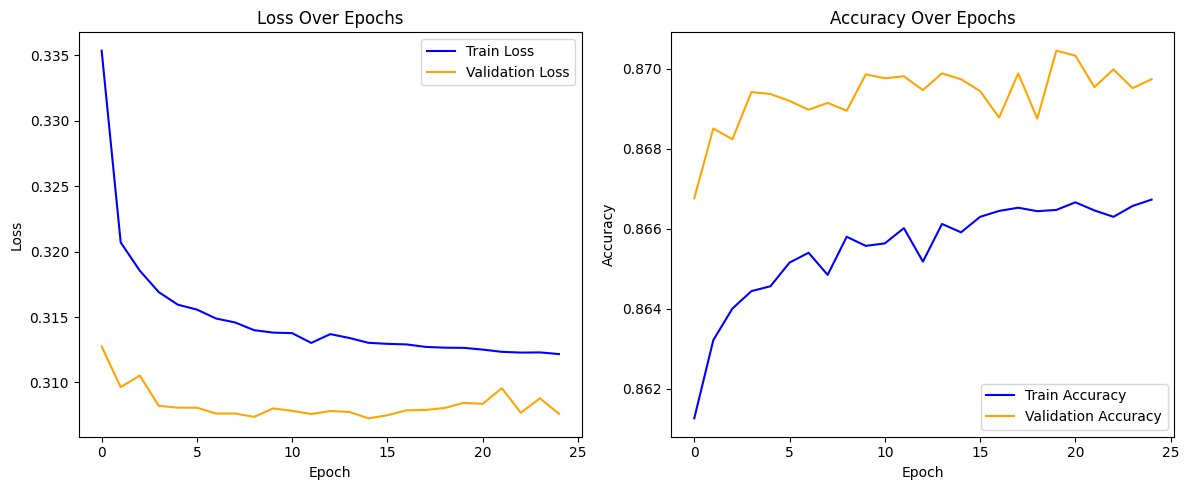

✅ learning_curves.png saved successfully!


In [13]:
# Plot Learning Curves
import matplotlib.pyplot as plt

# Create a NEW figure object explicitly
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# --- Plot Loss ---
axs[0].plot(history.history['loss'], label='Train Loss', color='blue')
axs[0].plot(history.history['val_loss'], label='Validation Loss', color='orange')
axs[0].set_title('Loss Over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# --- Plot Accuracy ---
axs[1].plot(history.history['accuracy'], label='Train Accuracy', color='blue')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
axs[1].set_title('Accuracy Over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# --- Tight layout for better spacing ---
plt.tight_layout()

# --- Save FIRST, then show ---
fig.savefig("learning_curvesWith50epoch.png", bbox_inches='tight')
plt.show()

print("✅ learning_curves.png saved successfully!")




In [14]:
# Generate Predictions and Reports
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) >= 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Confusion Matrix:
[[42960   707]
 [ 6121   948]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43667
         1.0       0.57      0.13      0.22      7069

    accuracy                           0.87     50736
   macro avg       0.72      0.56      0.57     50736
weighted avg       0.83      0.87      0.83     50736



In [15]:
# Save Results
plt.show()

# --- Then: save to file
plt.savefig("learning_curves.png", bbox_inches='tight')
print("✅ learning_curves.png saved successfully!")



✅ learning_curves.png saved successfully!


<Figure size 640x480 with 0 Axes>

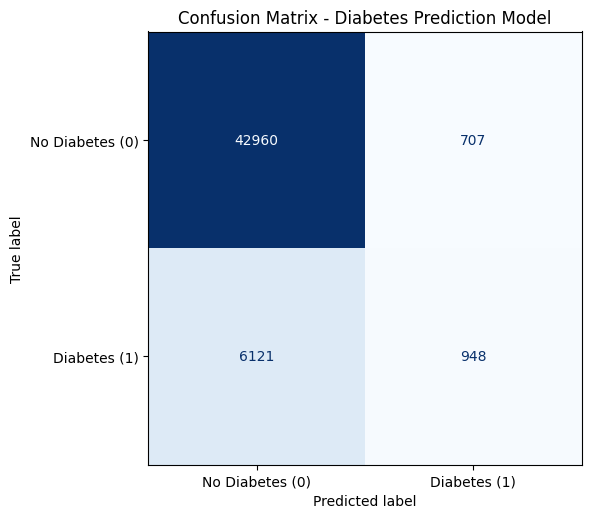

✅ confusion_matrix.png saved successfully!


In [16]:
# --- Confusion Matrix Plot ---
from sklearn.metrics import ConfusionMatrixDisplay

# draw
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes (0)', 'Diabetes (1)'])

fig_cm, ax_cm = plt.subplots(figsize=(6,6))
disp.plot(ax=ax_cm, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - Diabetes Prediction Model")
plt.tight_layout()

# save
fig_cm.savefig("confusion_matrix.png", bbox_inches='tight')
plt.show()
print("✅ confusion_matrix.png saved successfully!")
